🔹 1. Distribución de Nacionalidades de los Pilotos
📌 Objetivo: Crear un gráfico de barras con el número de pilotos por nacionalidad.
🔹 Librerías: pandas, matplotlib, seaborn
🔹 Tipo de gráfico: Barras

In [39]:
import pandas as pd   # Para cargar y manipular los datasets
import numpy as np    # Para operaciones numéricas


In [40]:
import matplotlib.pyplot as plt   # Para gráficos básicos
import seaborn as sns             # Para gráficos más avanzados y estéticos


In [41]:
drivers = pd.read_csv("drivers_updated.csv")
fastest_laps = pd.read_csv("fastest_laps_updated.csv")
teams = pd.read_csv("teams_updated.csv")
winners = pd.read_csv("winners.csv")

In [42]:
drivers.head()

,Pos,Driver,Nationality,Car,PTS,year,Code
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950,FAR
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950,FAN
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950,FAG
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950,ROS
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950,ASC


In [43]:
drivers_per_country = drivers['Nationality'].value_counts()
print(drivers_per_country)

GBR    299
ITA    193
FRA    185
GER    137
USA    135
BRA    111
FIN     65
ESP     51
AUS     51
AUT     44
NZL     38
BEL     36
ARG     35
JPN     35
SWE     33
SUI     31
MEX     30
CAN     27
NED     27
RSA     16
DEN     11
RUS     10
MON      9
POL      7
THA      7
VEN      6
COL      6
IND      5
POR      4
IRL      4
RHO      3
CHN      3
HUN      2
CHI      2
MAS      1
INA      1
RAF      1
Name: Nationality, dtype: int64


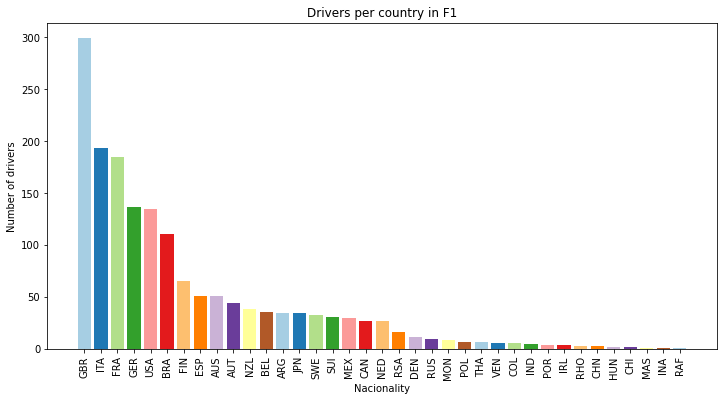

In [44]:
colors = plt.cm.Paired.colors
plt.figure(figsize=(12,6))
plt.bar(drivers_per_country.index, drivers_per_country.values, color = colors)
plt.xticks(rotation = 90)
plt.xlabel("Nacionality")
plt.ylabel("Number of drivers")
plt.title("Drivers per country in F1")
plt.show()

Reviamos los datos que contiene el DF
  Pos                Driver Nationality          Car   PTS  year Code
0   1         Nino  Farina          ITA   Alfa Romeo  30.0  1950  FAR
1   2  Juan Manuel  Fangio          ARG   Alfa Romeo  27.0  1950  FAN
2   3       Luigi  Fagioli          ITA   Alfa Romeo  24.0  1950  FAG
3   4         Louis Rosier          FRA  Talbot-Lago  13.0  1950  ROS
4   5      Alberto  Ascari          ITA      Ferrari  11.0  1950  ASC
Agrupamos los pilotos por año:
year
1950    22
1951    19
1952    22
1953    19
1954    26
        ..
2020    23
2021    21
2022    22
2023    22
2024    21
Name: Driver, Length: 75, dtype: int64


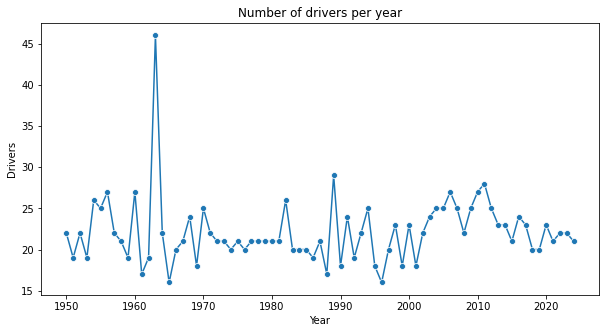

In [45]:
#Explorar los datos
print("Reviamos los datos que contiene el DF")
print(drivers.head())

# Agrupar pilotos por año 
drivers_per_year = drivers.groupby("year")["Driver"].nunique()
print ("Agrupamos los pilotos por año:")
print(drivers_per_year)

#Crear gráfico:
plt.figure(figsize=(10,5))
sns.lineplot(x = drivers_per_year.index, y = drivers_per_year.values, marker = "o")
plt.xlabel("Year")
plt.ylabel("Drivers")
plt.title("Number of drivers per year")

plt.show()


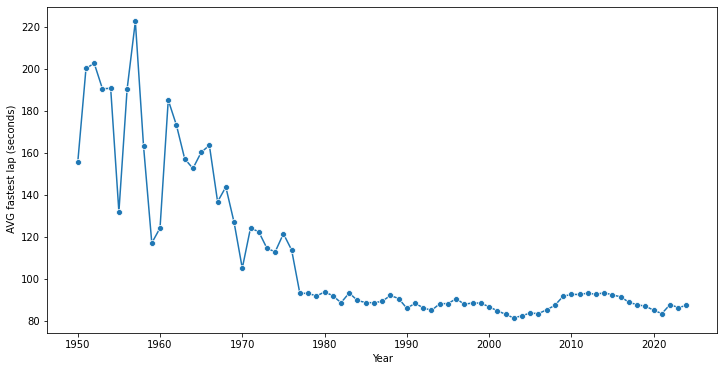

In [46]:
fastest_laps = fastest_laps.dropna(subset=["Time"])
fastest_laps["Time"] = "00:" + fastest_laps["Time"]  # Asegurar formato hh:mm:ss.sss
fastest_laps["Time"] = pd.to_timedelta(fastest_laps["Time"], errors="coerce")
fastest_laps["Time"] = fastest_laps["Time"].dt.total_seconds()

fastest_laps_per_year = fastest_laps.groupby('year')["Time"].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x = fastest_laps_per_year.index, y= fastest_laps_per_year.values, marker = "o")
plt.xlabel("Year")
plt.ylabel(" AVG fastest lap (seconds)")
plt.show()









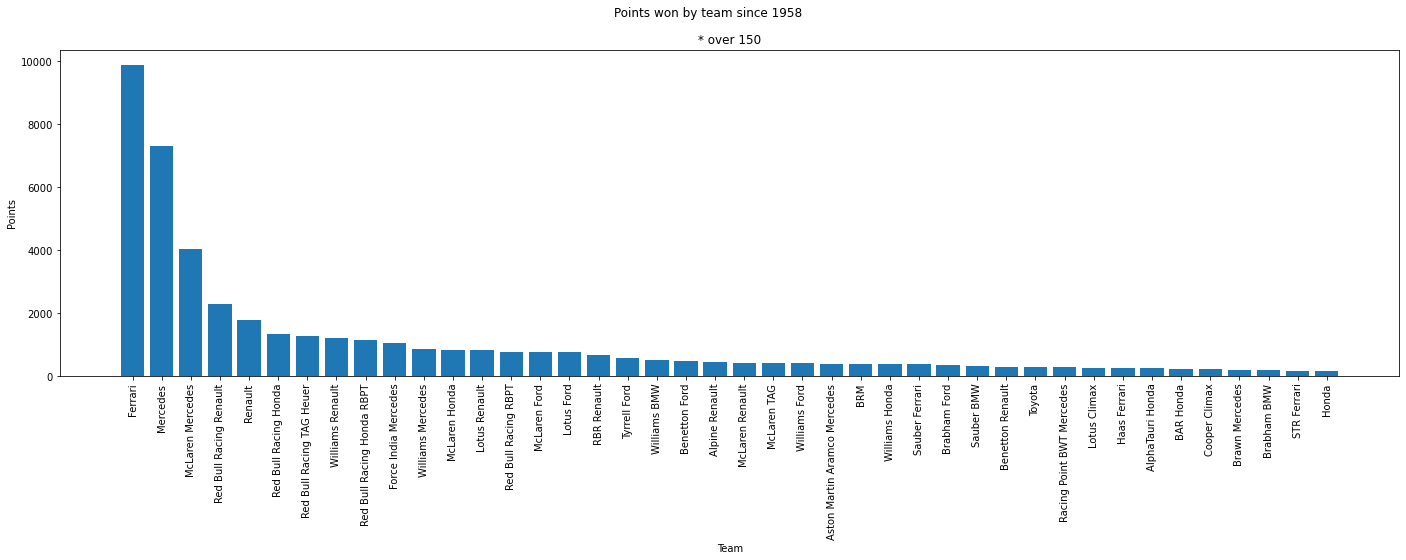

In [47]:
teams_points_year = teams.groupby('Team')["PTS"].sum()
teams_points_year = teams_points_year[teams_points_year > 150]
teams_points_year = teams_points_year.sort_values(ascending=False)


plt.figure(figsize= (24, 6))
plt.bar(x = teams_points_year.index, height = teams_points_year.values)
plt.xticks(rotation=90)
plt.suptitle("Points won by team since 1958")
plt.title("* over 150")
plt.xlabel("Team")
plt.ylabel("Points")
plt.show()

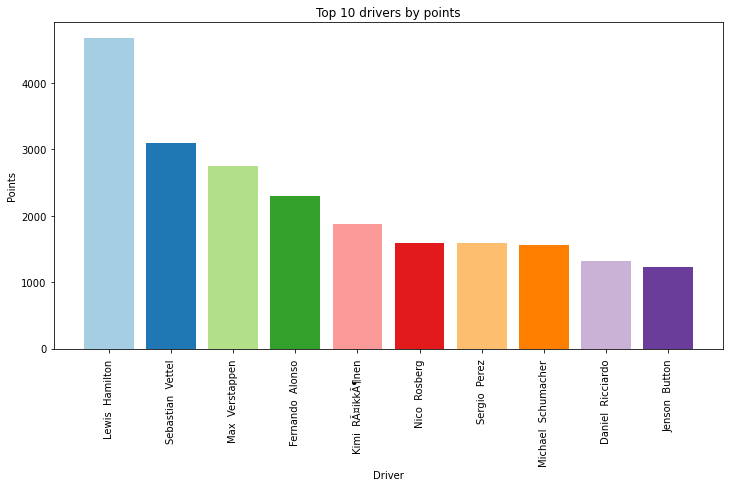

In [48]:
drivers.head()

drivers_points = drivers.groupby("Driver")["PTS"].sum()
drivers_points = drivers_points.sort_values(ascending = False).head(10)


plt.figure(figsize= (12, 6))
plt.bar(x = drivers_points.index, height = drivers_points.values, color = colors)
plt.xticks(rotation=90)
plt.title("Top 10 drivers by points")
plt.xlabel("Driver")
plt.ylabel("Points")
plt.show()
